In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data.csv", on_bad_lines='skip')

In [3]:
len(data)

669640

In [4]:
data.dropna(inplace=True)

In [5]:
len(data)

669639

In [6]:
df_0 = data[data.strength==0]
df_1 = data[data.strength==1]
df_2 = data[data.strength==2]

In [7]:
len(df_0),len(df_1),len(df_2)

(89701, 496801, 83137)

In [8]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_1, replace=False, n_samples=83137, random_state=123)

In [9]:
df_downsampled = pd.concat([df_majority_downsampled, df_0,df_2])

In [10]:
df_downsampled.strength.value_counts()

strength
0    89701
1    83137
2    83137
Name: count, dtype: int64

In [11]:
data=df_downsampled

In [12]:
data = np.array(data)

In [13]:
def remove_non_ascii(text):
    return text.encode('ascii', 'ignore').decode('ascii')

In [14]:
# remove all passwords with non-permitted chars
import re
cleanData=[]
regex = "^([a-z])([A-Z])(\d)([@$!%*#?&])$"
for i in data:
    t=remove_non_ascii(str(i[0]))
    cleanData.append([t,i[1]])
    

In [15]:
for i in cleanData:
    if len(str(i[0]))<6 or len(str(i[0]))>30:
        cleanData.remove(i)

In [16]:
import random
random.shuffle(cleanData)

In [17]:
X=[pw[0] for pw in cleanData]
y=[pw[1]for pw in cleanData]

In [18]:
X

['flash99',
 'glazkova-valerija0E',
 'asd142536',
 'marco90',
 'ynygivu826',
 'dx47piu',
 'smith12',
 'VgUX5tOFiQ4IhuI',
 'uADRr7DkxMQdBFX4',
 '01mariofabian',
 'dania17',
 'aptlunaysol_12',
 '2qaqa3',
 'h7vF5J0K8B6fVG',
 'j1et4f1nlti9',
 'pieski123',
 'jo4vu; BJ/6u4u/6',
 '63dPCsDQwOQRQyET',
 'janeks1',
 'vvvv99',
 '270895Mathking',
 'b2Z0LvTIwNAIg3S9',
 'morato1',
 'p0pityu',
 'bayala1',
 'atom11',
 'UrP5VCTE3MA4K2iz',
 '3fWM8Xjk3MAFaodv',
 'jsjdjks7',
 '399xEcORIByBulY',
 'G1rOXwDM4MwUFynx',
 'toluca2',
 'sina12',
 '123diehard',
 'wealth1',
 'dpa-agit135790',
 'ugD6OZTI5MwX5mdL',
 'x5s0le9b',
 'perro86',
 'marypompi123',
 'erinenu827',
 'kdp999',
 'UbajaGaTEsOm428',
 'ghsd0n',
 'Mg67bLzg5MgucnlD',
 'w5w4X6TEzMAhdGIE',
 'nadie17',
 'KIROO2010',
 'R6dCegDExNQQgk8P',
 'cowboy123',
 'franco128',
 'prikolas1',
 'a7xrock',
 'LLTMrdzQwMw7vExb',
 'soybueno28',
 'owyzcj3',
 'yasiris509',
 'breakq1',
 '4k9dzlm39',
 '0SSel2zc1Mga8AKx',
 'pablomf123',
 'rhghvb8',
 'GVMproject@7674824',
 'lywcfj

In [19]:
def toChar(inp):
    chars=[]
    for i in inp:
        chars.append(i)
    return chars

In [20]:
X=[toChar(i) for i in X]

In [21]:
X

[['f', 'l', 'a', 's', 'h', '9', '9'],
 ['g',
  'l',
  'a',
  'z',
  'k',
  'o',
  'v',
  'a',
  '-',
  'v',
  'a',
  'l',
  'e',
  'r',
  'i',
  'j',
  'a',
  '0',
  'E'],
 ['a', 's', 'd', '1', '4', '2', '5', '3', '6'],
 ['m', 'a', 'r', 'c', 'o', '9', '0'],
 ['y', 'n', 'y', 'g', 'i', 'v', 'u', '8', '2', '6'],
 ['d', 'x', '4', '7', 'p', 'i', 'u'],
 ['s', 'm', 'i', 't', 'h', '1', '2'],
 ['V', 'g', 'U', 'X', '5', 't', 'O', 'F', 'i', 'Q', '4', 'I', 'h', 'u', 'I'],
 ['u',
  'A',
  'D',
  'R',
  'r',
  '7',
  'D',
  'k',
  'x',
  'M',
  'Q',
  'd',
  'B',
  'F',
  'X',
  '4'],
 ['0', '1', 'm', 'a', 'r', 'i', 'o', 'f', 'a', 'b', 'i', 'a', 'n'],
 ['d', 'a', 'n', 'i', 'a', '1', '7'],
 ['a', 'p', 't', 'l', 'u', 'n', 'a', 'y', 's', 'o', 'l', '_', '1', '2'],
 ['2', 'q', 'a', 'q', 'a', '3'],
 ['h', '7', 'v', 'F', '5', 'J', '0', 'K', '8', 'B', '6', 'f', 'V', 'G'],
 ['j', '1', 'e', 't', '4', 'f', '1', 'n', 'l', 't', 'i', '9'],
 ['p', 'i', 'e', 's', 'k', 'i', '1', '2', '3'],
 ['j',
  'o',
  '4',
  'v'

In [22]:
train_text, test_text, train_y, test_y = train_test_split(X,y,test_size = 0.2)

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS = 93

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_text)
sequences = tokenizer.texts_to_sequences(train_text)
sequences_test = tokenizer.texts_to_sequences(test_text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

c:\Users\PC\Desktop\Projects\Academics\Thesis\workspaceThesis\myEnv\lib\site-packages\keras\src\preprocessing\text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


Found 71 unique tokens.


In [24]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [25]:
index_to_word

{1: 'a',
 2: '1',
 3: 'e',
 4: 'o',
 5: 'i',
 6: 'n',
 7: 'm',
 8: '2',
 9: 't',
 10: '0',
 11: 'r',
 12: 's',
 13: 'u',
 14: 'd',
 15: 'l',
 16: '3',
 17: 'y',
 18: 'g',
 19: 'k',
 20: 'c',
 21: '9',
 22: '5',
 23: '4',
 24: 'w',
 25: 'j',
 26: 'z',
 27: 'h',
 28: 'q',
 29: 'p',
 30: '8',
 31: 'b',
 32: '7',
 33: '6',
 34: 'v',
 35: 'f',
 36: 'x',
 37: '.',
 38: '@',
 39: '-',
 40: '_',
 41: '!',
 42: '*',
 43: '#',
 44: '$',
 45: '/',
 46: ' ',
 47: '+',
 48: '&',
 49: '?',
 50: '%',
 51: ';',
 52: ')',
 53: '(',
 54: '^',
 55: '=',
 56: '[',
 57: ']',
 58: '<',
 59: '~',
 60: '>',
 61: '}',
 62: '{',
 63: '|',
 64: '\\',
 65: '`',
 66: '"',
 67: '\x7f',
 68: '\x1c',
 69: '\x12',
 70: '\x1b',
 71: '\x08'}

In [26]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 10.6
max length: 30


In [27]:
MAX_SEQUENCE_LENGTH = 30

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

In [30]:
from keras.utils import to_categorical
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (204501, 3)


In [29]:
x_train.shape

(204501, 30)

In [32]:
import tensorflow as tf
from keras import layers, models
from sklearn.model_selection import KFold

# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

acc_per_fold=[]
loss_per_fold=[]
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    model = models.Sequential()
    model.add(layers.Input(30,dtype='int32'))
    model.add(layers.Embedding(input_dim=93,output_dim=10, input_length=30,trainable=True))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(30,activation="relu"))
    model.add(layers.Dropout(.5))
    model.add(layers.Dense(3,activation="softmax"))
    model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=100,
              epochs=5,
              verbose=1)

    # Generate generalization metrics
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1



------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5


2046/2046 [==============================] - 4s 2ms/step - loss: 0.1164 - accuracy: 0.9556
Epoch 2/5
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0332 - accuracy: 0.9868
Epoch 3/5
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9913
Epoch 4/5
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0186 - accuracy: 0.9946
Epoch 5/5
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9959
Score for fold 1: loss of 0.003807702101767063; accuracy of 99.98826384544373%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
2046/2046 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9558
Epoch 2/5
2046/2046 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9847
Epoch 3/5
2046/20

In [33]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.003807702101767063 - Accuracy: 99.98826384544373%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.0008638863218948245 - Accuracy: 99.9941349029541%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.002321778330951929 - Accuracy: 99.98826384544373%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.0008140965364873409 - Accuracy: 99.99021887779236%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.002399832010269165 - Accuracy: 99.9941349029541%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 99.9910032749176 (+- 0.0026547472517268475)
> Loss: 0.0020414590602740646
-------------

In [31]:
from keras.utils import to_categorical
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=3, 
                    validation_split=.25)



Epoch 1/3


4793/4793 [==============================] - 9s 2ms/step - loss: 0.1082 - accuracy: 0.9548 - val_loss: 0.0048 - val_accuracy: 0.9989
Epoch 2/3
4793/4793 [==============================] - 8s 2ms/step - loss: 0.0612 - accuracy: 0.9723 - val_loss: 5.7716e-04 - val_accuracy: 0.9999
Epoch 3/3
4793/4793 [==============================] - 8s 2ms/step - loss: 0.0602 - accuracy: 0.9763 - val_loss: 5.5118e-04 - val_accuracy: 0.9999


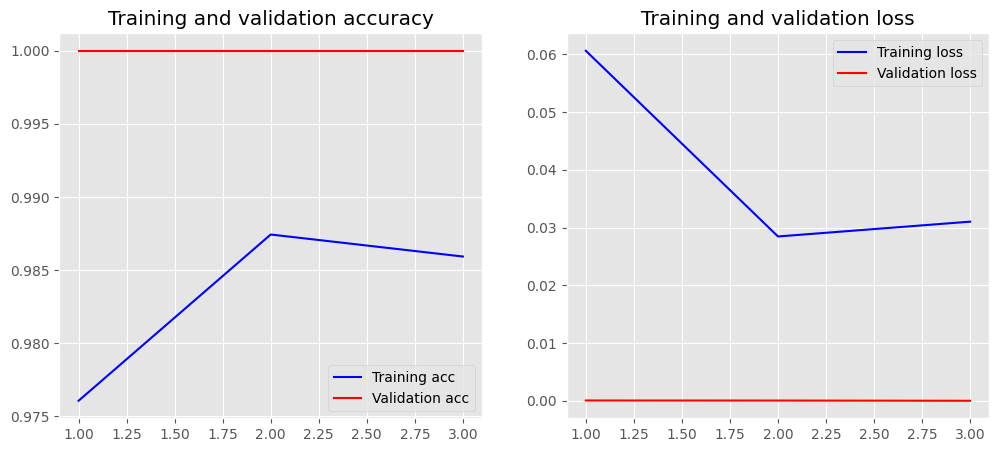

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)


In [38]:
from sklearn.metrics import roc_auc_score
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test,multi_class="ovr"))

1598/1598 [==============================] - 1s 754us/step
test auc: 0.9999915988523913


In [39]:
output_test[0:20]

array([[9.99998927e-01, 1.02371689e-06, 0.00000000e+00],
       [0.00000000e+00, 6.02749064e-20, 1.00000000e+00],
       [0.00000000e+00, 4.30624774e-13, 1.00000000e+00],
       [0.00000000e+00, 5.10095961e-05, 9.99948978e-01],
       [0.00000000e+00, 4.32249993e-13, 1.00000000e+00],
       [8.44627692e-08, 9.99999881e-01, 0.00000000e+00],
       [1.00558989e-36, 1.00000000e+00, 4.63572764e-33],
       [0.00000000e+00, 4.46345516e-13, 1.00000000e+00],
       [9.99999881e-01, 6.11593407e-08, 0.00000000e+00],
       [1.28950308e-08, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.44790223e-08, 0.00000000e+00],
       [1.00000000e+00, 5.74837031e-08, 0.00000000e+00],
       [1.00000000e+00, 1.51845312e-19, 0.00000000e+00],
       [0.00000000e+00, 1.23045245e-08, 1.00000000e+00],
       [1.00000000e+00, 4.44607950e-09, 0.00000000e+00],
       [0.00000000e+00, 7.28448985e-13, 1.00000000e+00],
       [1.00000000e+00, 7.42381268e-10, 0.00000000e+00],
       [0.00000000e+00, 3.02845

In [232]:
y_test

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
